<a href="https://colab.research.google.com/github/Omar-Abd-Elwahab/VCF_fiilter/blob/main/vcf_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Opening the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp ./drive/MyDrive/Colab\ Notebooks/deepref/hg003_snps.csv /content


In [ ]:
ls

drive/  hg003_snps.csv  sample_data/  unique_words.txt


In [ ]:
pwd

'/content'

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("hg003_snps.csv", low_memory=False)
df=df.drop(df.columns[[0, 1]], axis=1)

# Report the number of sentences.
print('Number of training lines: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(3)

Number of training lines: 12,776,714



,ALT,QUAL,FILTER,INFO,FORMAT,HG003
7214250,T,100.028,0,DP=8;VDB=0.145712;RPBZ=-1.0435;BQBZ=1.29099;SC...,GT:PL,"0/1:133,0,77"
10358951,C,270.64,0,AC=1;AF=0.5;AN=2;BaseQRankSum=-0.055;DP=15;Exc...,GT:AD:DP:GQ:PL,"0/1:5,9:14:99:278,0,137"
11423790,T,138.64,1,AC=1;AF=0.5;AN=2;BaseQRankSum=-0.108;DP=8;Exce...,GT:AD:DP:GQ:PL,"0/1:3,4:7:93:146,0,93"


In [ ]:
df=df[1:]

In [ ]:
df.groupby('FILTER').size()

FILTER
0    9808038
1    2968675
dtype: int64

In [ ]:
df = df.sample(1000000, random_state=42)
# Report the number of sentences.
print('Number of training lines: {:,}\n'.format(df.shape[0]))
# Display 10 random rows from the data.
df.sample(10)

Number of training lines: 1,000,000



,ALT,QUAL,FILTER,INFO,FORMAT,HG003
7141022,T,225.417,0,DP=11;VDB=0.491564;FS=0.0;SGB=-0.676189;MQ0F=0...,GT:PL,"1/1:255,33,0"
10297984,A,102.64,0,AC=1;AF=0.5;AN=2;BaseQRankSum=0.0;DP=6;ExcessH...,GT:AD:DP:GQ:PL,"0/1:3,3:6:99:110,0,110"
10324035,C,209.64,0,AC=1;AF=0.5;AN=2;BaseQRankSum=1.969;DP=13;Exce...,GT:AD:DP:GQ:PL,"0/1:7,6:13:99:217,0,230"
10097077,T,241.97,0,AC=2;AF=1.0;AN=2;DP=7;ExcessHet=0.0;FS=0.0;MLE...,GT:AD:DP:GQ:PL,"1/1:0,6:6:18:256,18,0"
9117347,C,288.64,0,AC=1;AF=0.5;AN=2;BaseQRankSum=-1.02;DP=15;Exce...,GT:AD:DP:GQ:PL,"0/1:6,8:14:99:296,0,214"
8418395,C,167.416,0,DP=8;VDB=0.0092202;FS=0.0;SGB=-0.651104;MQ0F=0...,GT:PL,"1/1:197,24,0"
9280669,C,522.06,0,AC=2;AF=1.0;AN=2;DP=14;ExcessHet=0.0;FS=0.0;ML...,GT:AD:DP:GQ:PL,"1/1:0,13:13:39:536,39,0"
3704323,C,129.13,0,AC=1;AF=0.5;AN=2;BaseQRankSum=-0.04;ClippingRa...,GT:AD:DP:GQ:PL,"0/1:6,4:10:99:130,0,184"
3813608,C,521.13,0,AC=2;AF=1.0;AN=2;DP=13;Entropy=0.43;ExcessHet=...,GT:AD:DP:GQ:PL,"1/1:0,13:13:39:522,39,0"
8190261,T,80.2033,0,DP=7;VDB=0.314313;RPBZ=0.0;BQBZ=1.36533;SCBZ=-...,GT:PL,"0/1:113,0,72"


In [ ]:

# Assuming you have a DataFrame called 'df' with columns 'col1', 'col2', 'col3', and 'col_to_exclude'

# Get all column names except the one to exclude
columns_to_merge = [col for col in df.columns if col != 'FILTER']

# Define a lambda function to merge the values of selected columns
merge_columns = lambda row: ' '.join(str(row[col]) for col in columns_to_merge)

# Merge columns using the defined function
df['merged_column'] = df.apply(merge_columns, axis=1)

# Drop the original columns
df = df.drop(columns=columns_to_merge)

# Print the resulting DataFrame
print(df.sample(3))


         FILTER                                      merged_column
5198783       0  G 46.272 DP=7;VDB=0.748679;RPBZ=1.06066;BQBZ=-...
10997006      0  A 560.06 AC=2;AF=1.0;AN=2;DP=15;ExcessHet=0.0;...
279544        1  T 109.13 AC=1;AF=0.5;AN=2;BaseQRankSum=-0.319;...


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [ ]:
!pip install transformers

In [ ]:
from transformers import BertConfig, BertModel, BertTokenizer,  BertForSequenceClassification

tokenizer = BertTokenizer("unique_words.txt", do_lower_case = True,
                          do_basic_tokenize = True, never_split = None,
                          unk_token = '[UNK]', sep_token = '[SEP]', pad_token = '[PAD]',
                          cls_token = '[CLS]', mask_token = '[MASK]',
                          tokenize_chinese_chars = False, strip_accents = None)
config = BertConfig(vocab_size = len(tokenizer), hidden_size = 768,
                           num_hidden_layers = 6, num_attention_heads = 6,
                           intermediate_size = 3072, hidden_act = 'sigmoid',
                           hidden_dropout_prob = 0.1, attention_probs_dropout_prob = 0.1,
                           max_position_embeddings = 512,
                           initializer_range = 0.02, layer_norm_eps = 1e-12,
                           pad_token_id = 0, position_embedding_type = 'absolute',
                           use_cache = False, classifier_dropout = None, num_labels=2,
                           output_attentions = False, # Whether the model returns attentions weights.
                           output_hidden_states = False, # Whether the model returns all hidden-states.
)
model =  BertForSequenceClassification(config)


In [ ]:
# Get the lists of sentences and their labels.
sentences = df.merged_column.values
labels = df.FILTER.values

In [ ]:
import numpy as np
labels = labels.astype(np.int64)

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  T 67.2291 DP=11;VDB=0.148314;RPBZ=-1.82574;BQBZ=-2.9469;SCBZ=0.270801;FS=0.0;SGB=-0.590765;MQ0F=0.0;AC=1;AN=2;DP4=4,2,3,2;MQ=60 GT:PL 0/1:100,0,154
Tokenized:  ['t', '67', '.', '229', '##1', 'dp', '=', '11', ';', 'vdb', '=', '0', '.', '148', '##31', '##4', ';', 'rpbz', '=', '-', '1', '.', '82', '##57', '##4', ';', 'bqbz', '=', '-', '2', '.', '94', '##6', '##9', ';', 'scbz', '=', '0', '.', '270', '##80', '##1', ';', 'fs', '=', '0', '.', '0', ';', 'sgb', '=', '-', '0', '.', '590', '##7', '##65', ';', 'mq', '##0', '##f', '=', '0', '.', '0', ';', 'ac', '=', '1', ';', 'an', '=', '2', ';', 'dp', '##4', '=', '4', ',', '2', ',', '3', ',', '2', ';', 'mq', '=', '60', 'gt', ':', 'pl', '0', '/', '1', ':', '100', ',', '0', ',', '154']
Token IDs:  [1056, 6163, 1012, 22777, 2487, 30529, 1027, 2340, 1025, 30615, 1027, 1014, 1012, 16459, 21486, 2549, 1025, 30611, 1027, 1011, 1015, 1012, 6445, 28311, 2549, 1025, 30612, 1027, 1011, 1016, 1012, 6365, 2575, 2683, 1025, 30613, 1027, 1014, 1012, 

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  T 67.2291 DP=11;VDB=0.148314;RPBZ=-1.82574;BQBZ=-2.9469;SCBZ=0.270801;FS=0.0;SGB=-0.590765;MQ0F=0.0;AC=1;AN=2;DP4=4,2,3,2;MQ=60 GT:PL 0/1:100,0,154
Token IDs: [101, 1056, 6163, 1012, 22777, 2487, 30529, 1027, 2340, 1025, 30615, 1027, 1014, 1012, 16459, 21486, 2549, 1025, 30611, 1027, 1011, 1015, 1012, 6445, 28311, 2549, 1025, 30612, 1027, 1011, 1016, 1012, 6365, 2575, 2683, 1025, 30613, 1027, 1014, 1012, 13756, 17914, 2487, 1025, 30551, 1027, 1014, 1012, 1014, 1025, 30614, 1027, 1011, 1014, 1012, 25186, 2581, 26187, 1025, 30545, 2692, 2546, 1027, 1014, 1012, 1014, 1025, 9353, 1027, 1015, 1025, 2019, 1027, 1016, 1025, 30529, 2549, 1027, 1018, 1010, 1016, 1010, 1017, 1010, 1016, 1025, 30545, 1027, 3438, 14181, 1024, 20228, 1014, 1013, 1015, 1024, 2531, 1010, 1014, 1010, 16666, 102]


In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  238


In [ ]:
from keras.utils import pad_sequences

In [ ]:
# We'll borrow the `pad_sequences` utility function to do this.
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 256

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 256 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:

    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 80% for training and 20% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=42, test_size=0.3)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.3)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 400

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

#model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30616, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-5): 6 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, e

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 105 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30616, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 20

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
val_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()


    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.5f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1


    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.5f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    val_values.append(eval_accuracy/nb_eval_steps)
print("")
print("Training complete!")


======== Epoch 1 / 20 ========
Training...
  Batch    40  of  1,750.    Elapsed: 0:01:08.
  Batch    80  of  1,750.    Elapsed: 0:02:15.
  Batch   120  of  1,750.    Elapsed: 0:03:22.
  Batch   160  of  1,750.    Elapsed: 0:04:29.
  Batch   200  of  1,750.    Elapsed: 0:05:36.
  Batch   240  of  1,750.    Elapsed: 0:06:42.
  Batch   280  of  1,750.    Elapsed: 0:07:49.
  Batch   320  of  1,750.    Elapsed: 0:08:56.
  Batch   360  of  1,750.    Elapsed: 0:10:03.
  Batch   400  of  1,750.    Elapsed: 0:11:10.
  Batch   440  of  1,750.    Elapsed: 0:12:17.
  Batch   480  of  1,750.    Elapsed: 0:13:24.
  Batch   520  of  1,750.    Elapsed: 0:14:31.
  Batch   560  of  1,750.    Elapsed: 0:15:38.
  Batch   600  of  1,750.    Elapsed: 0:16:46.
  Batch   640  of  1,750.    Elapsed: 0:17:53.
  Batch   680  of  1,750.    Elapsed: 0:19:00.
  Batch   720  of  1,750.    Elapsed: 0:20:07.
  Batch   760  of  1,750.    Elapsed: 0:21:14.
  Batch   800  of  1,750.    Elapsed: 0:22:21.
  Batch   840  o

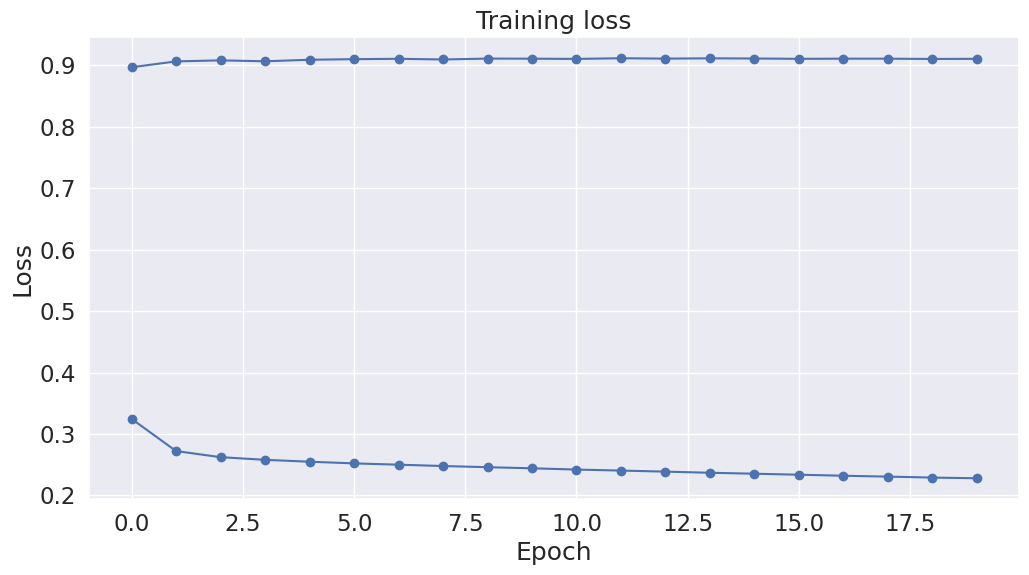

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')
plt.plot(val_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()